In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Gentle start with one dimensional data

Let us consider a set $Y$ of point on the real line:  1, 3, 7, 2.

**Question** Create a 1d-array `Y` for these values

In [2]:
Y = np.array([1,3,7,2])
Y

array([1, 3, 7, 2])

In [3]:
Y.shape

(4,)

We want to calculate all pairs of distances involving elements of $Y$. It will be stored in a matrix  `M` such that  `M[i,j] = Y[i] - Y[j]` for `i` and `j` in `Y`. We will use broadcasting for that!

**Question** Create a (4, 1) matrix `a` and a (1, 4) matrix `b` containing `Y` and `Y.T`.

In [5]:
a = Y.reshape(4,1)
a

array([[1],
       [3],
       [7],
       [2]])

In [8]:
b = Y.reshape(1,4)
b

array([[1, 3, 7, 2]])

In [9]:
b.shape

(1, 4)

**Question** Try 

    np.arange(5)[:, np.newaxis]
    
Use that trick to create `a` and `b`! 

In [11]:
np.arange(5)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [14]:
a = Y[:, np.newaxis]
b = Y[np.newaxis, :]
print(a)
print(b)

[[1]
 [3]
 [7]
 [2]]
[[1 3 7 2]]


**Question** Observe the value of `a - b`. Read the [documentation of broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) and describe what numpy did to calculate `a-b`. 

In [15]:
 a- b

array([[ 0, -2, -6, -1],
       [ 2,  0, -4,  1],
       [ 6,  4,  0,  5],
       [ 1, -1, -5,  0]])

*Answer* : NumPy used broadcasting and automatically expanded both arrays so they could match into shape (4, 4). And then performed elementwise subtraction.

**Question** Compute the square of this matrix `a-b` in `dsquared`.

In [16]:
dsquared = (a-b) ** 2
dsquared

array([[ 0,  4, 36,  1],
       [ 4,  0, 16,  1],
       [36, 16,  0, 25],
       [ 1,  1, 25,  0]])

**Question** Read the documentation of [np.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) and try this example 

    np.argsort(np.array([1, 0, 12, 2]))
    
Why do you have 1, 0, 3, 2 as a result? 

In [18]:
np.argsort(np.array([1,0,12,2]))

array([1, 0, 3, 2])

*Answer*: np.argsort returns the indices that would sort the array in ascending order.
The array [1,0,12,2] sorted is [0,1,2,12].
Those come from original indices [1,0,3,2].

**Question** Use `argsort` on `dsquared` to obtain a matrix such that for each line $i$ you have the indexes of points ordered by the squared distance to point $i$.   

In [19]:
nn = np.argsort(dsquared, axis=1)
nn


array([[0, 3, 1, 2],
       [1, 3, 0, 2],
       [2, 1, 3, 0],
       [3, 0, 1, 2]])

# In 2 dimensions... 

**Question** Sample uniformly 10 points in $[0,1]^2$. (Hint: Use `np.random.rand`). Store the result in `X`.

In [20]:
X = np.random.rand(10,2)
X

array([[0.46761148, 0.96122135],
       [0.30236575, 0.70146726],
       [0.16139528, 0.61495399],
       [0.83657163, 0.91904807],
       [0.96054265, 0.83597962],
       [0.91801362, 0.12814337],
       [0.00978696, 0.69743032],
       [0.0725492 , 0.54239921],
       [0.64028365, 0.91254695],
       [0.81208745, 0.48703819]])

**Question** Draw the points on a diagram.

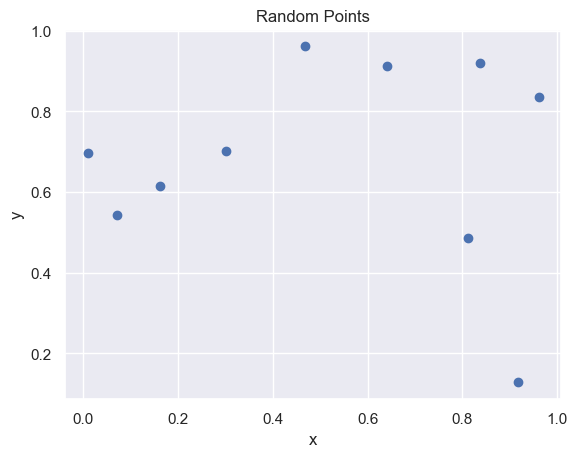

In [22]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Random Points")
plt.show()

Note the meaning of each axis in `X`. The first axis (rows) is the index of a point in the set (the first row is the first point). The second axis is the index of the coordinates (The first column is the first coordinate, ie the x-axis; The second column is the second coordinate, ie the y-axis) 

**Question** Now create `a` and `b` by adding a third axis using `np.newaxis` at the right position so that 

$$a[i, j, k] - b[i, j, k] = X[i, k] - X[j, k]$$

Hint: As you can see in this expression, $i$ and $j$ are indexes of points and $k$ is the index of a coordinate. Broacasting will help to stretch the axis that corresponds to indexes of points...

In [27]:
a = X[:, np.newaxis, :]   
b = X[np.newaxis, :, :]  

print(a.shape)
print(b.shape)

print((a-b).shape)

(10, 1, 2)
(1, 10, 2)
(10, 10, 2)


**Question** Now you can calculate in `dsquared_coord` the squared value of the difference on each coordinate of all pairs of points. 

In [26]:
dsquared_coord = (a - b) ** 2
dsquared_coord

array([[[0.00000000e+00, 0.00000000e+00],
        [2.73061514e-02, 6.74721895e-02],
        [9.37683596e-02, 1.19901085e-01],
        [1.36131595e-01, 1.77858550e-03],
        [2.42981140e-01, 1.56854925e-02],
        [2.02862089e-01, 6.94018926e-01],
        [2.09603288e-01, 6.95857094e-02],
        [1.56074200e-01, 1.75411989e-01],
        [2.98156783e-02, 2.36919717e-03],
        [1.18663694e-01, 2.24849674e-01]],

       [[2.73061514e-02, 6.74721895e-02],
        [0.00000000e+00, 0.00000000e+00],
        [1.98726726e-02, 7.48454533e-03],
        [2.85375927e-01, 4.73414110e-02],
        [4.33196835e-01, 1.80935745e-02],
        [3.79022302e-01, 3.28700281e-01],
        [8.56023461e-02, 1.62968796e-05],
        [5.28156436e-02, 2.53026445e-02],
        [1.14188507e-01, 4.45546375e-02],
        [2.59816212e-01, 4.59798265e-02]],

       [[9.37683596e-02, 1.19901085e-01],
        [1.98726726e-02, 7.48454533e-03],
        [0.00000000e+00, 0.00000000e+00],
        [4.55863105e-01, 9.247

**Question** It is now easy to compute with `sum` the squared distance between each pair of points! This is `dsquared`. It is a (10, 10) matrix...

In [30]:
dsquared = dsquared_coord.sum(axis=2)
dsquared.shape

(10, 10)

**Question** Now use `np.argsort` to get a (10, 10) matrix `nn` that indicates in row $i$ the indices of points that are the closest to point $i$. 

In [31]:
nn = np.argsort(dsquared, axis=1)
nn

array([[0, 8, 1, 3, 2, 4, 6, 7, 9, 5],
       [1, 2, 7, 6, 0, 8, 9, 3, 4, 5],
       [2, 7, 1, 6, 0, 8, 9, 3, 4, 5],
       [3, 4, 8, 0, 9, 1, 2, 5, 7, 6],
       [4, 3, 8, 9, 0, 1, 5, 2, 7, 6],
       [5, 9, 4, 3, 8, 1, 2, 7, 0, 6],
       [6, 7, 2, 1, 0, 8, 9, 3, 4, 5],
       [7, 2, 6, 1, 0, 8, 9, 3, 4, 5],
       [8, 0, 3, 4, 1, 9, 2, 6, 7, 5],
       [9, 5, 4, 3, 8, 1, 0, 2, 7, 6]])

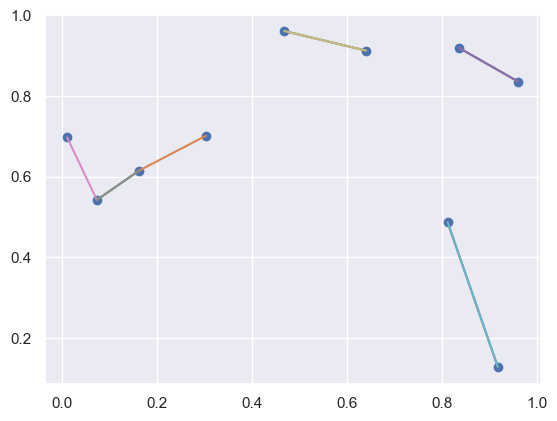

In [32]:
plt.scatter(X[:, 0], X[:, 1])
for i in range(10):
    p = np.vstack([X[i, :], X[nn[i, 1]]])
    plt.plot(p[:,0], p[:,1])